### Objective:
Assuming the role of the Brand Manager of the focal firm “Hotel Taj Agra”, the objective here is to analyse customer behaviour patterns across the 3 different units of the same firm (Hotel Taj) and provide recommendations to the management of the focal firm. The hotel industry is the fastest growing and profitable industry in India. It is important to understand the customer behaviour and preferences.
Taj Hotels is a chain of luxury hotels and a subsidiary of the Indian Hotels Company Limited, headquartered at Express Towers, Nariman Point in Mumbai. Incorporated by the founder of the Tata Group, Jamshedji Tata, in 1903, the company is a part of the Tata Group, one of India's largest business conglomerates.
In this study the focal firm is the Hotel Taj Agra (‘Taj Hotel & Convention Centre, Agra’) and the other 2 units are Taj Mahal, New Delhi and Taj Lake Palace, Udaipur.
#### Methodology: 
Extracting review data from the website Tripadvisor for the 3 hotels. Then applying text pre-processing steps on the data collected and performing Topic modelling using LDA. Interpreting the topics and comparing them across the units.


In [1]:
from os import listdir
from os.path import join
import pandas as pd
import numpy as np
import nltk.corpus 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

import re 
import string
import math
import os
from pprint import pprint


import requests
from lxml import html
import matplotlib.pyplot as plt

import nltk

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel



# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Data Extraction
Data Collection:  500 reviews were scraped from the Tripadvisor website for all the three Hotels using HTML parsing through Selector Gadget.

### Scraping Reviews From Hotel_Taj_Resorts-Agra
i = 1
hotel_Review_final= pd.DataFrame()


while i< 101:
    url= 'https://www.tripadvisor.in/Hotel_Review-g297683-d1930271-Reviews-or'+ str(5*i) + '-Hotel_Taj_Resorts-Agra_Agra_District_Uttar_Pradesh.html'
    doc = requests.get(url)
    htmlpage = doc.content
    i=i+1

    
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "IRsGHoPm", " " ))]//text()'
    data = parser.xpath(sampXpath)
    review= pd.DataFrame(data)

    review = review.replace(['…'],'NaN')
    review.columns = ["Review"]
    review.drop( review[ review['Review'] == 'NaN' ].index, inplace=True)
    review.reset_index(drop = True, inplace=True)
 
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "nf9vGX55", " " ))]/span/@class'
    rating = parser.xpath(sampXpath)

   
    ratingp= [int(r.replace('ui_bubble_rating bubble_',''))/10 for r in rating]
    new= pd.DataFrame(ratingp)
    new.columns = ["Rating"]
    new.reset_index(drop = True, inplace=True)


    hotel_Review = pd.concat([review["Review"], new["Rating"]], axis=1)
    hotel_Review_final= hotel_Review_final.append(hotel_Review, ignore_index=True)

hotel_Review_final

hotel_Review_final.to_csv("C:/Users/kanik/Desktop/Desktop/ABA/Text Analytics/Assignment/Individual Assignment-2/Taj_Resorts-Agra.csv", index=False)

### Scraping Reviews From Taj_Mahal-New_Delhi_National_Capital_Territory_of_Delhi
i = 1
hotel_Review_final1= pd.DataFrame()


while i< 101:
    url= 'https://www.tripadvisor.in/Hotel_Review-g304551-d302182-Reviews-or'+ str(5*i) + '-Taj_Mahal-New_Delhi_National_Capital_Territory_of_Delhi.html'
    doc = requests.get(url)
    htmlpage = doc.content
    i=i+1
    
    
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "IRsGHoPm", " " ))]//text()'
    data = parser.xpath(sampXpath)
    review= pd.DataFrame(data)

    review = review.replace(['…'],'NaN')
    review.columns = ["Review"]
    review.drop( review[ review['Review'] == 'NaN' ].index, inplace=True)
    review.reset_index(drop = True, inplace=True)
 
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "nf9vGX55", " " ))]/span/@class'
    rating = parser.xpath(sampXpath)

   
    ratingp= [int(r.replace('ui_bubble_rating bubble_',''))/10 for r in rating]
    new= pd.DataFrame(ratingp)
    new.columns = ["Rating"]
    new.reset_index(drop = True, inplace=True)


    hotel_Review = pd.concat([review["Review"], new["Rating"]], axis=1)
    hotel_Review_final1= hotel_Review_final1.append(hotel_Review, ignore_index=True)


hotel_Review_final1

hotel_Review_final1.to_csv("C:/Users/kanik/Desktop/Desktop/ABA/Text Analytics/Assignment/Individual Assignment-2/Taj_Mahal-New_Delhi.csv", index=False)

### Scraping Reviews From Taj_Lake_Palace_Udaipur

i = 1
hotel_Review_final2= pd.DataFrame()


while i< 101:
    url= 'https://www.tripadvisor.in/Hotel_Review-g297672-d302377-Reviews-or'+ str(5*i) + '-Taj_Lake_Palace_Udaipur-Udaipur_Udaipur_District_Rajasthan.html'
    doc = requests.get(url)
    htmlpage = doc.content
    i=i+1
  
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "IRsGHoPm", " " ))]//text()'
    data = parser.xpath(sampXpath)
    review= pd.DataFrame(data)

    review = review.replace(['…'],'NaN')
    review.columns = ["Review"]
    review.drop( review[ review['Review'] == 'NaN' ].index, inplace=True)
    review.reset_index(drop = True, inplace=True)
 
    parser = html.fromstring(htmlpage)
    sampXpath = '//*[contains(concat( " ", @class, " " ), concat( " ", "nf9vGX55", " " ))]/span/@class'
    rating = parser.xpath(sampXpath)

    
    ratingp= [int(r.replace('ui_bubble_rating bubble_',''))/10 for r in rating]
    new= pd.DataFrame(ratingp)
    new.columns = ["Rating"]
    new.reset_index(drop = True, inplace=True)

    hotel_Review = pd.concat([review["Review"], new["Rating"]], axis=1)
    hotel_Review_final2= hotel_Review_final2.append(hotel_Review, ignore_index=True)


hotel_Review_final2

hotel_Review_final2.to_csv("C:/Users/kanik/Desktop/Desktop/ABA/Text Analytics/Assignment/Individual Assignment-2/Taj_Lake_Palace_Udaipur.csv", index=False)

In [2]:
Review_Taj_Agra= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Taj_Resorts-Agra.csv",index_col=False)

pd.set_option("display.max_colwidth", -1)

In [3]:
Review_Taj_Agra

,Review,Rating
0,"Great Hotel, well positioned for the Taj. Real...",5.0
1,The staff at the hotel are great - always tryi...,4.0
2,When you are at Agra what are the most importa...,5.0
3,"excellent hotel, staff were friendly and court...",5.0
4,Me and my wife stayed at Hotel Taj Resorts for...,5.0
...,...,...
495,My stay to Taj Resort was very pleasant one. I...,4.0
496,"Our stay at Taj resorts was amazing, all the s...",5.0
497,Awesome place to stay more than one days. Good...,5.0
498,We stayed 2 nights at this hotel Everything w...,2.0


In [4]:
Review_Taj_Delhi= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Taj_Mahal-New_Delhi.csv",index_col=False)

In [5]:
Review_Taj_Delhi

,Review,Rating
0,I had gone there to spend a cosy close knit Ne...,5.0
1,"I have stayed in multiple Taj properties, obvi...",2.0
2,"We checked in at Taj Palace, Delhi on 12-12-20...",2.0
3,This iconic building located in the heart of D...,5.0
4,"Rooms were very neat and clean, very higenic.b...",3.0
...,...,...
495,My husband and I stayed Taji Mahal New Delhi f...,5.0
496,My husband and I spent 2 days at this lovely h...,5.0
497,Our only regret was that we arrived tired from...,5.0
498,My wife and I just spent 2 nights at the Taj M...,5.0


In [6]:
Review_Taj_Udaipur= pd.read_csv("https://raw.githubusercontent.com/Kanikaitbhu/Data-Files/main/Taj_Lake_Palace_Udaipur.csv",index_col=False)

In [7]:
Review_Taj_Udaipur

,Review,Rating
0,We have stayed at taj lake palace for two nigh...,5.0
1,had an amazing and mesmerizing experience. The...,5.0
2,On the last day of our trip to Udaipur we deci...,5.0
3,Visited the property for a private dinner for ...,5.0
4,Where should I start..........I mean we were i...,5.0
...,...,...
495,"The hotel is very old, over run with pigeons a...",1.0
496,"The location, decore, service and attention to...",5.0
497,The staff were very rude when they assumed tha...,1.0
498,My wife and I recently went to Taj Lake Palace...,5.0


In [8]:
### Rating distribution for our data
Review_Taj_Agra['Rating'].value_counts()

5.0    290
4.0    162
3.0     29
2.0     11
1.0      8
Name: Rating, dtype: int64

In [9]:
### Rating distribution for our data
Review_Taj_Delhi['Rating'].value_counts()

5.0    343
4.0    105
3.0     31
2.0     14
1.0      7
Name: Rating, dtype: int64

In [10]:
### Rating distribution for our data
Review_Taj_Udaipur['Rating'].value_counts()

5.0    457
4.0     19
1.0     12
3.0      8
2.0      4
Name: Rating, dtype: int64

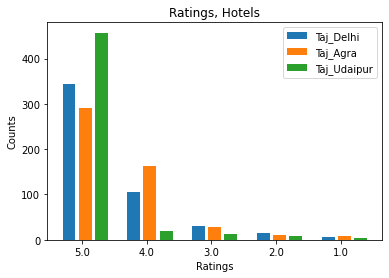

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

index = np.arange(5)
bar_width = 0.20
fig, ax = plt.subplots()

Taj_Delhi = ax.bar(index, Review_Taj_Delhi['Rating'].value_counts(), bar_width, label = "Taj_Delhi")
Taj_Agra = ax.bar(index+0.25, Review_Taj_Agra['Rating'].value_counts(),bar_width, label ="Taj_Agra")
Taj_Udaipur = ax.bar(index+0.50, Review_Taj_Udaipur['Rating'].value_counts(),bar_width, label ="Taj_Udaipur")

ax.set_xlabel('Ratings')
ax.set_ylabel('Counts')
ax.set_title('Ratings, Hotels')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(["5.0", "4.0", "3.0", "2.0", "1.0"])
ax.legend()
plt.show()

The Taj Hotels in Delhi and Udaipur have higher ratio of 5.0 customer rating than the Taj Hotel at Agra. Our intention is to find out what different is being done at the two hotel which can be implemented at Agra unit to improve the ratings.

In [12]:

### plotting the word clouds

from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

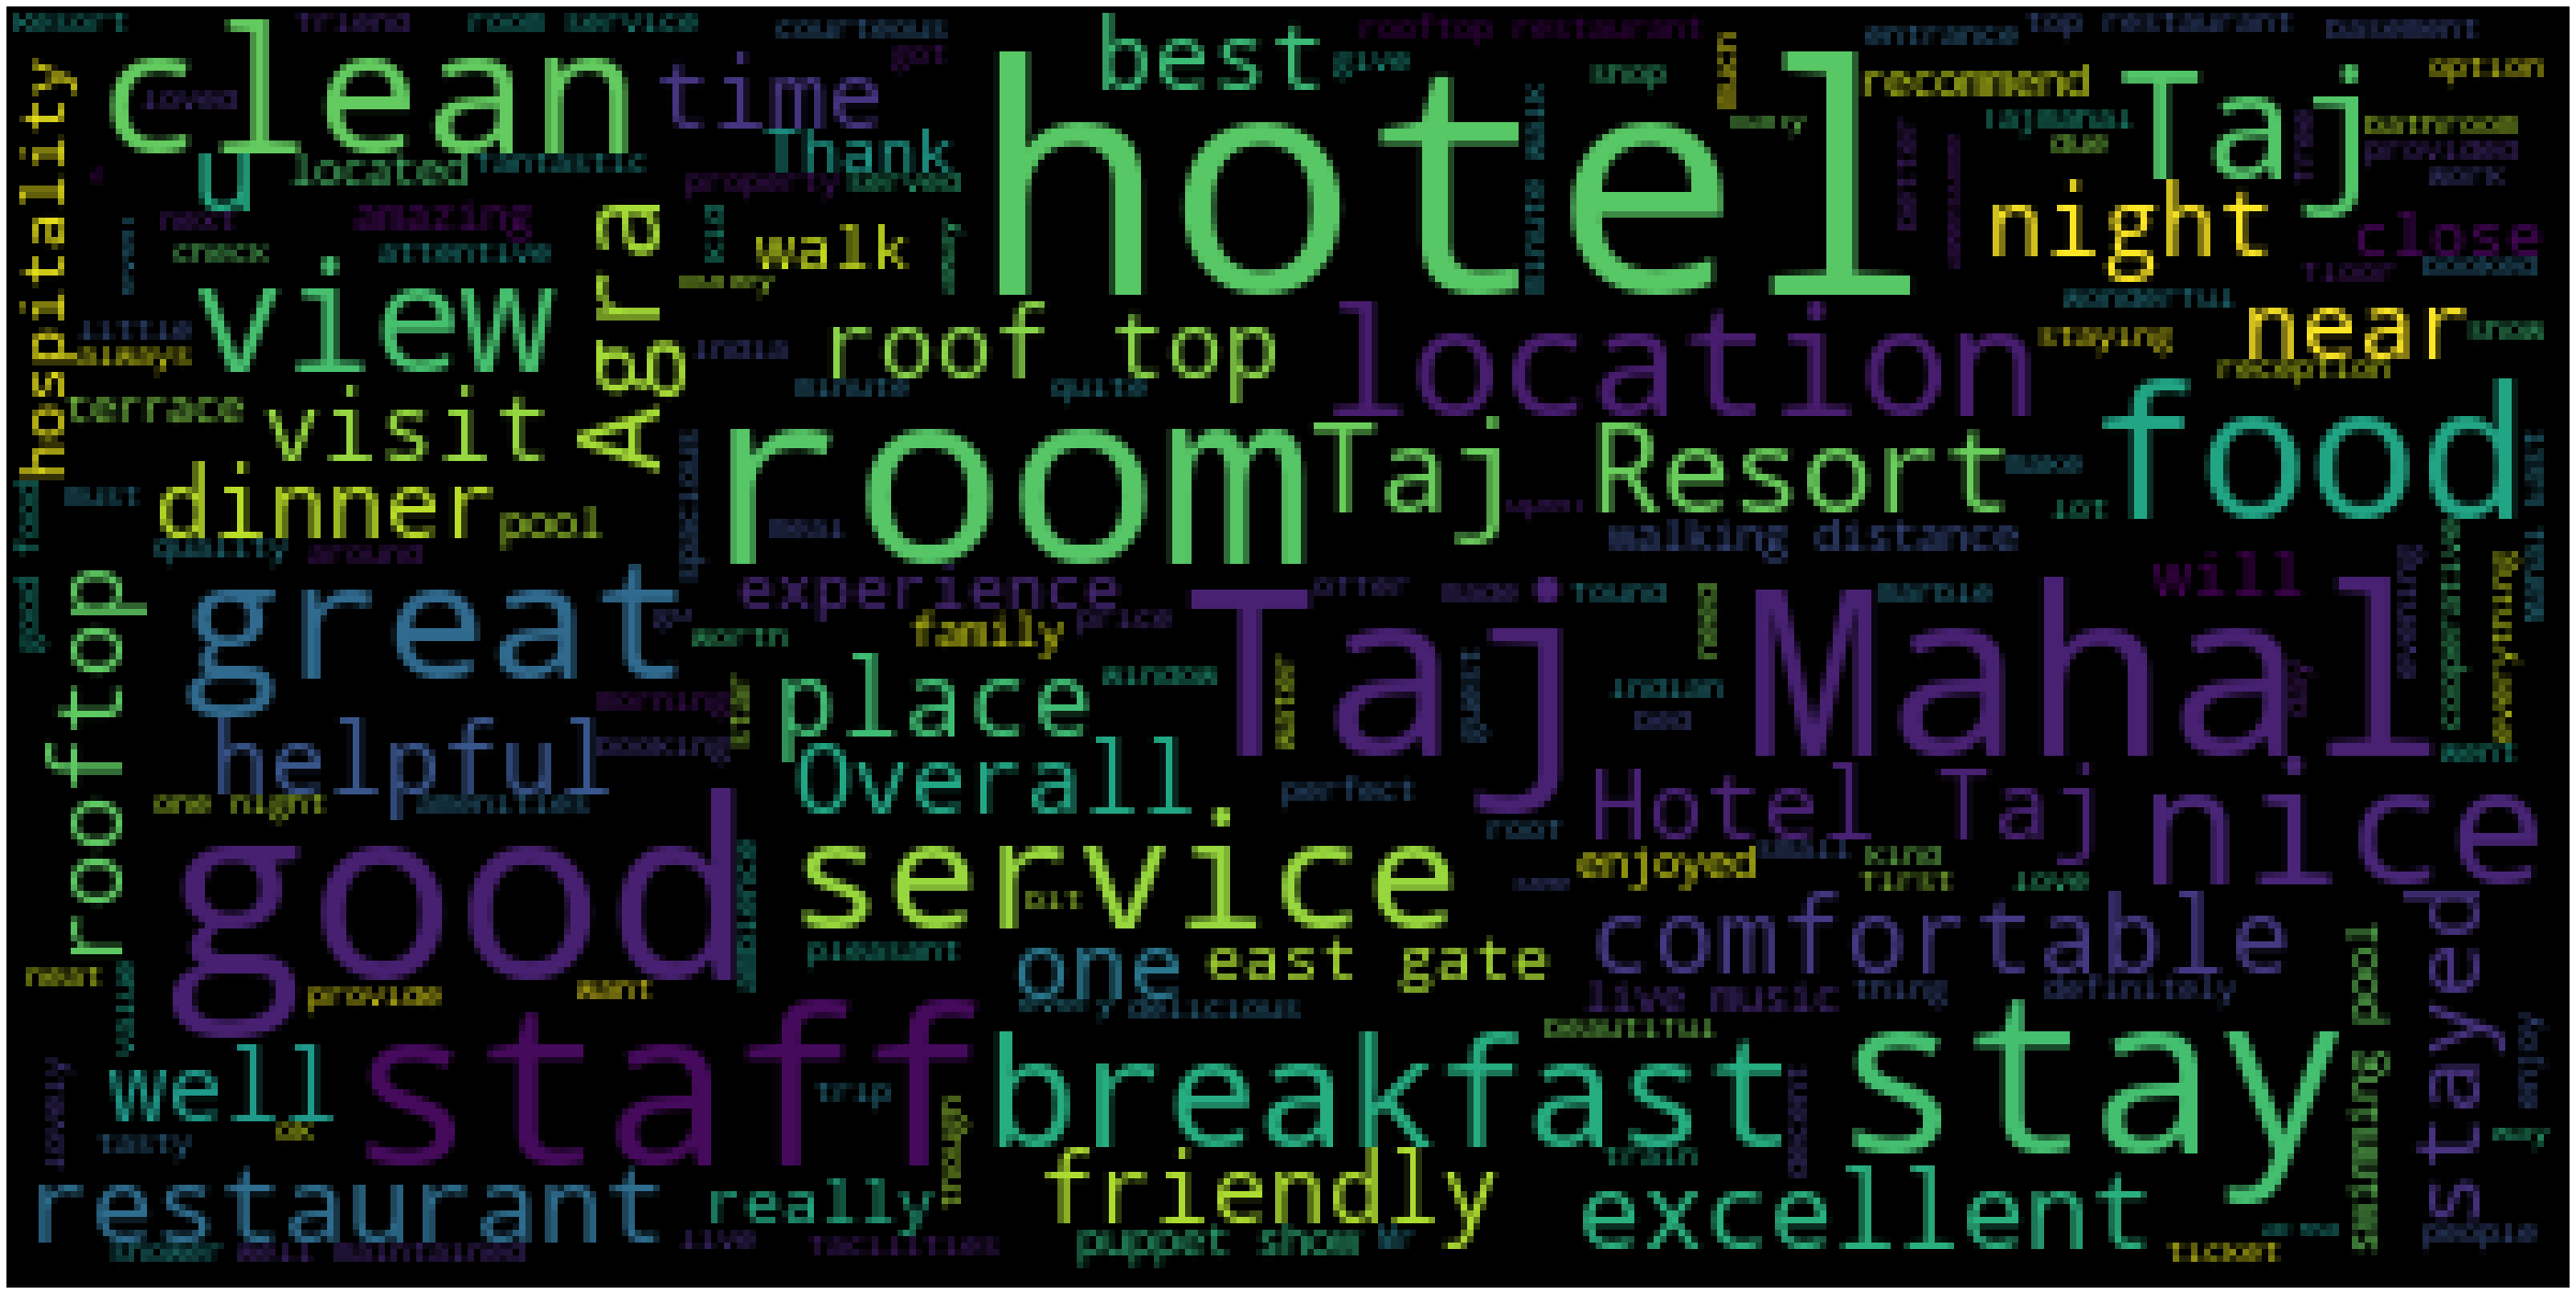

In [13]:
### Word Cloud for Positive Reviews
wc(Review_Taj_Agra['Review'],'black','Common Words' )

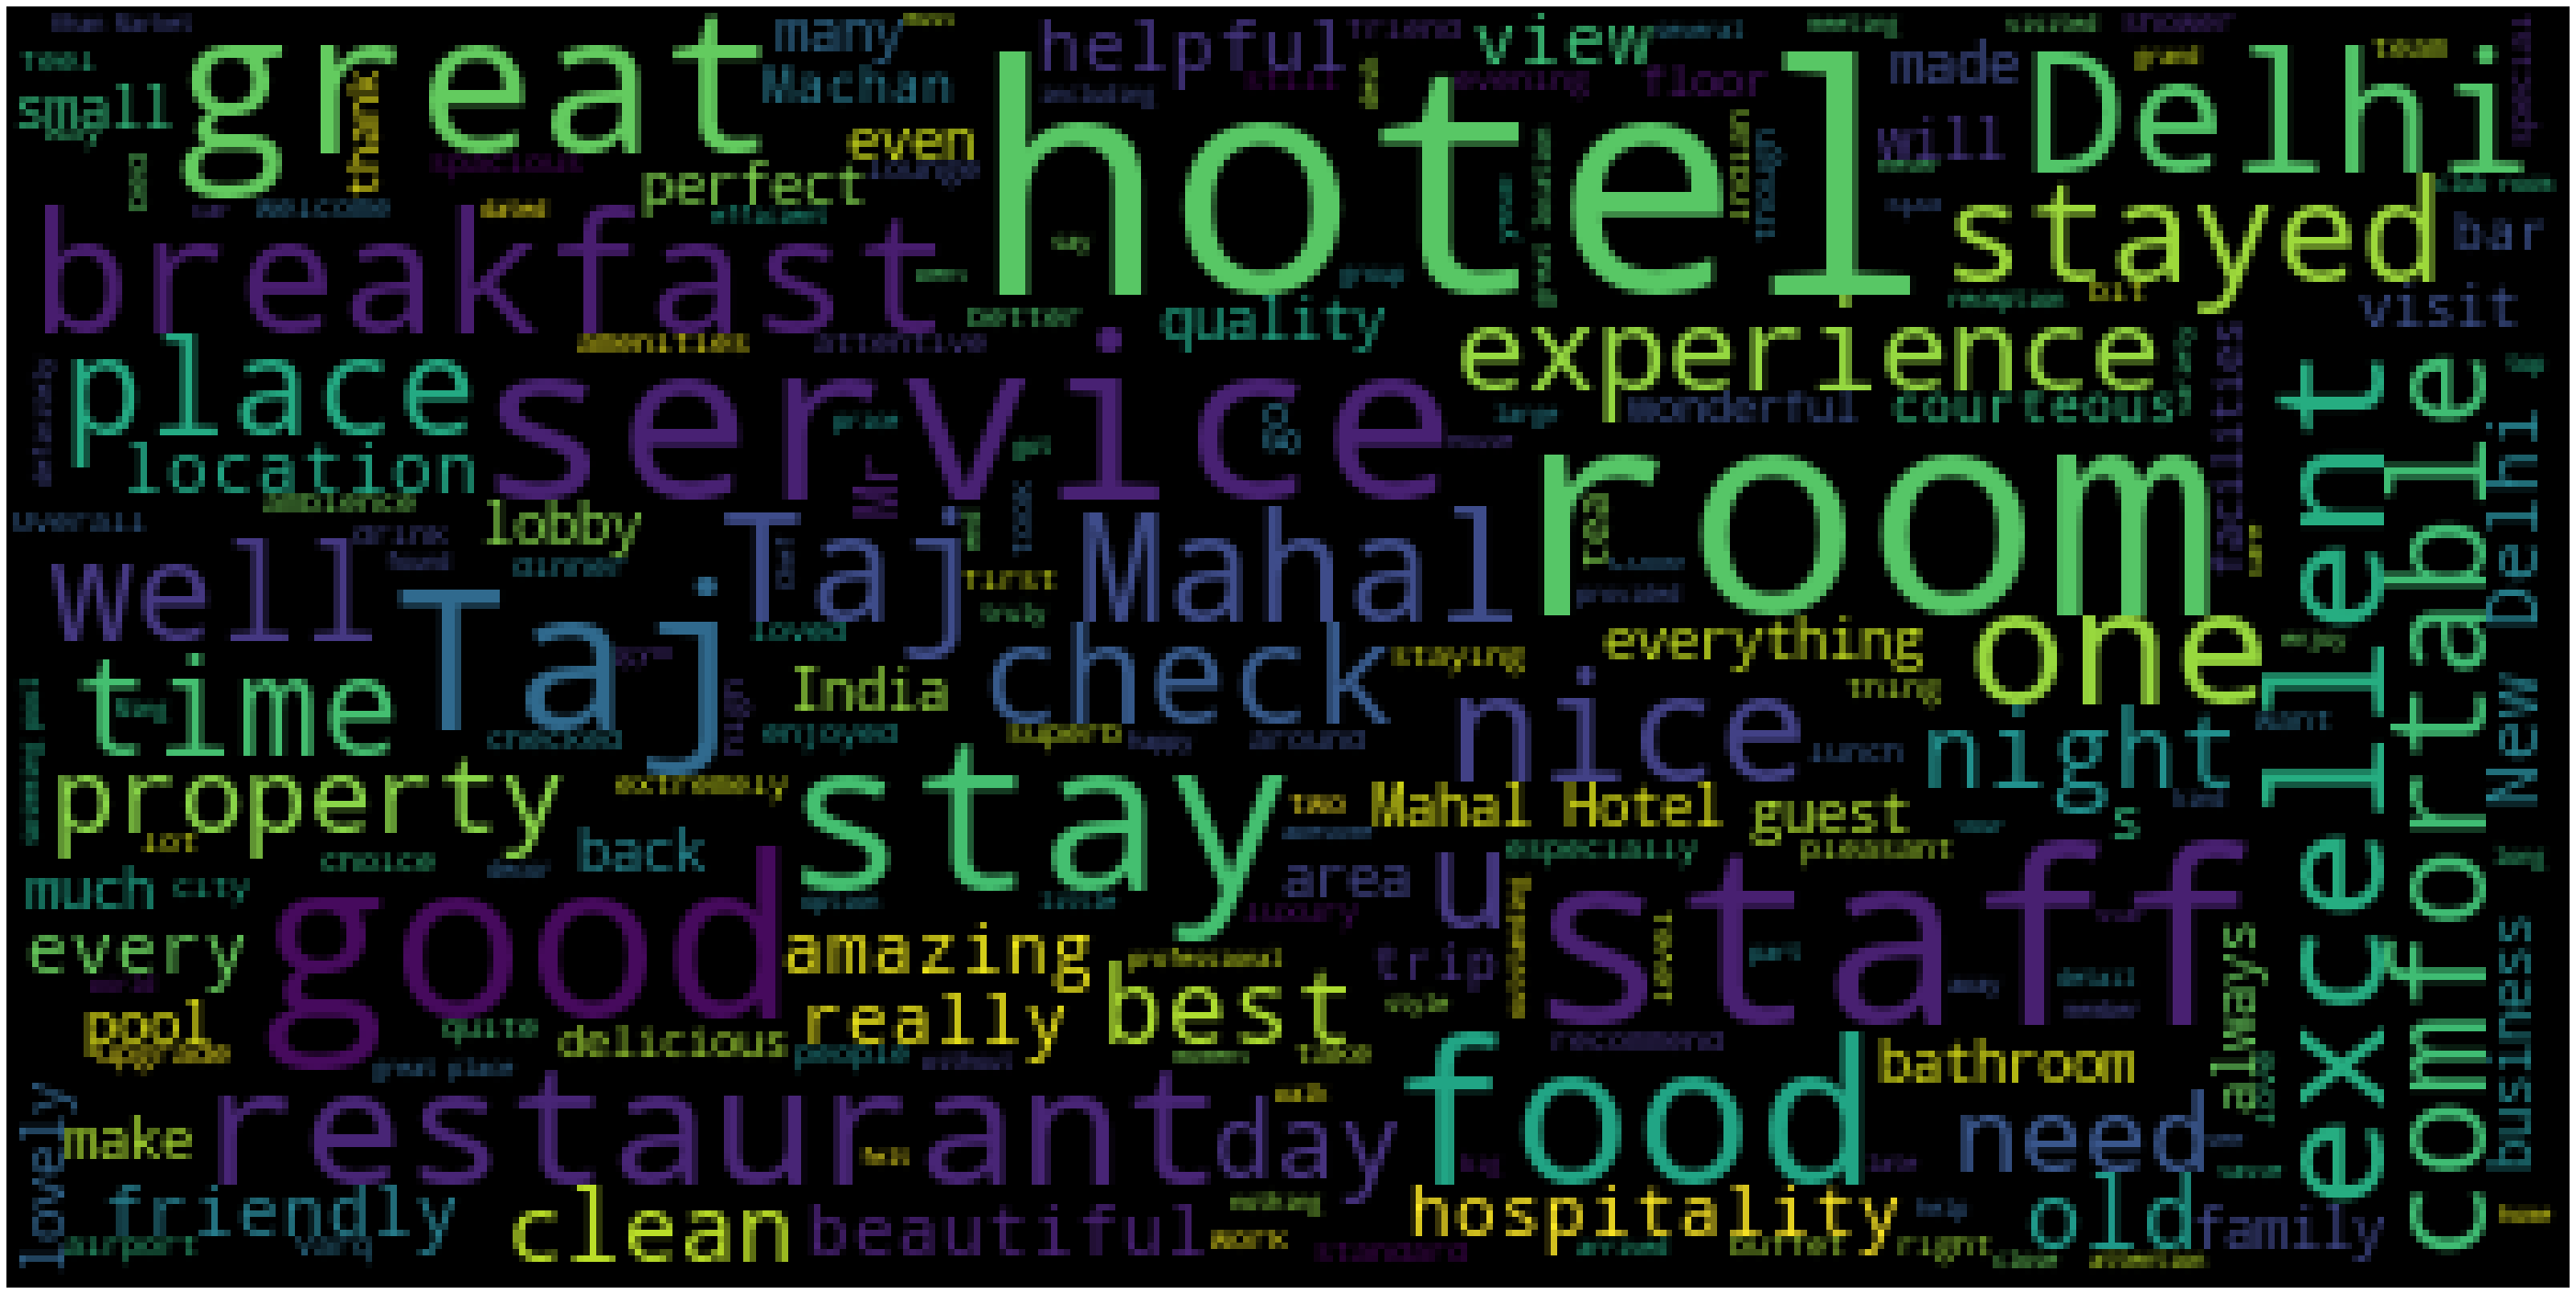

In [14]:
### Word Cloud for Neutral Reviews
wc(Review_Taj_Delhi['Review'],'black','Common Words' )

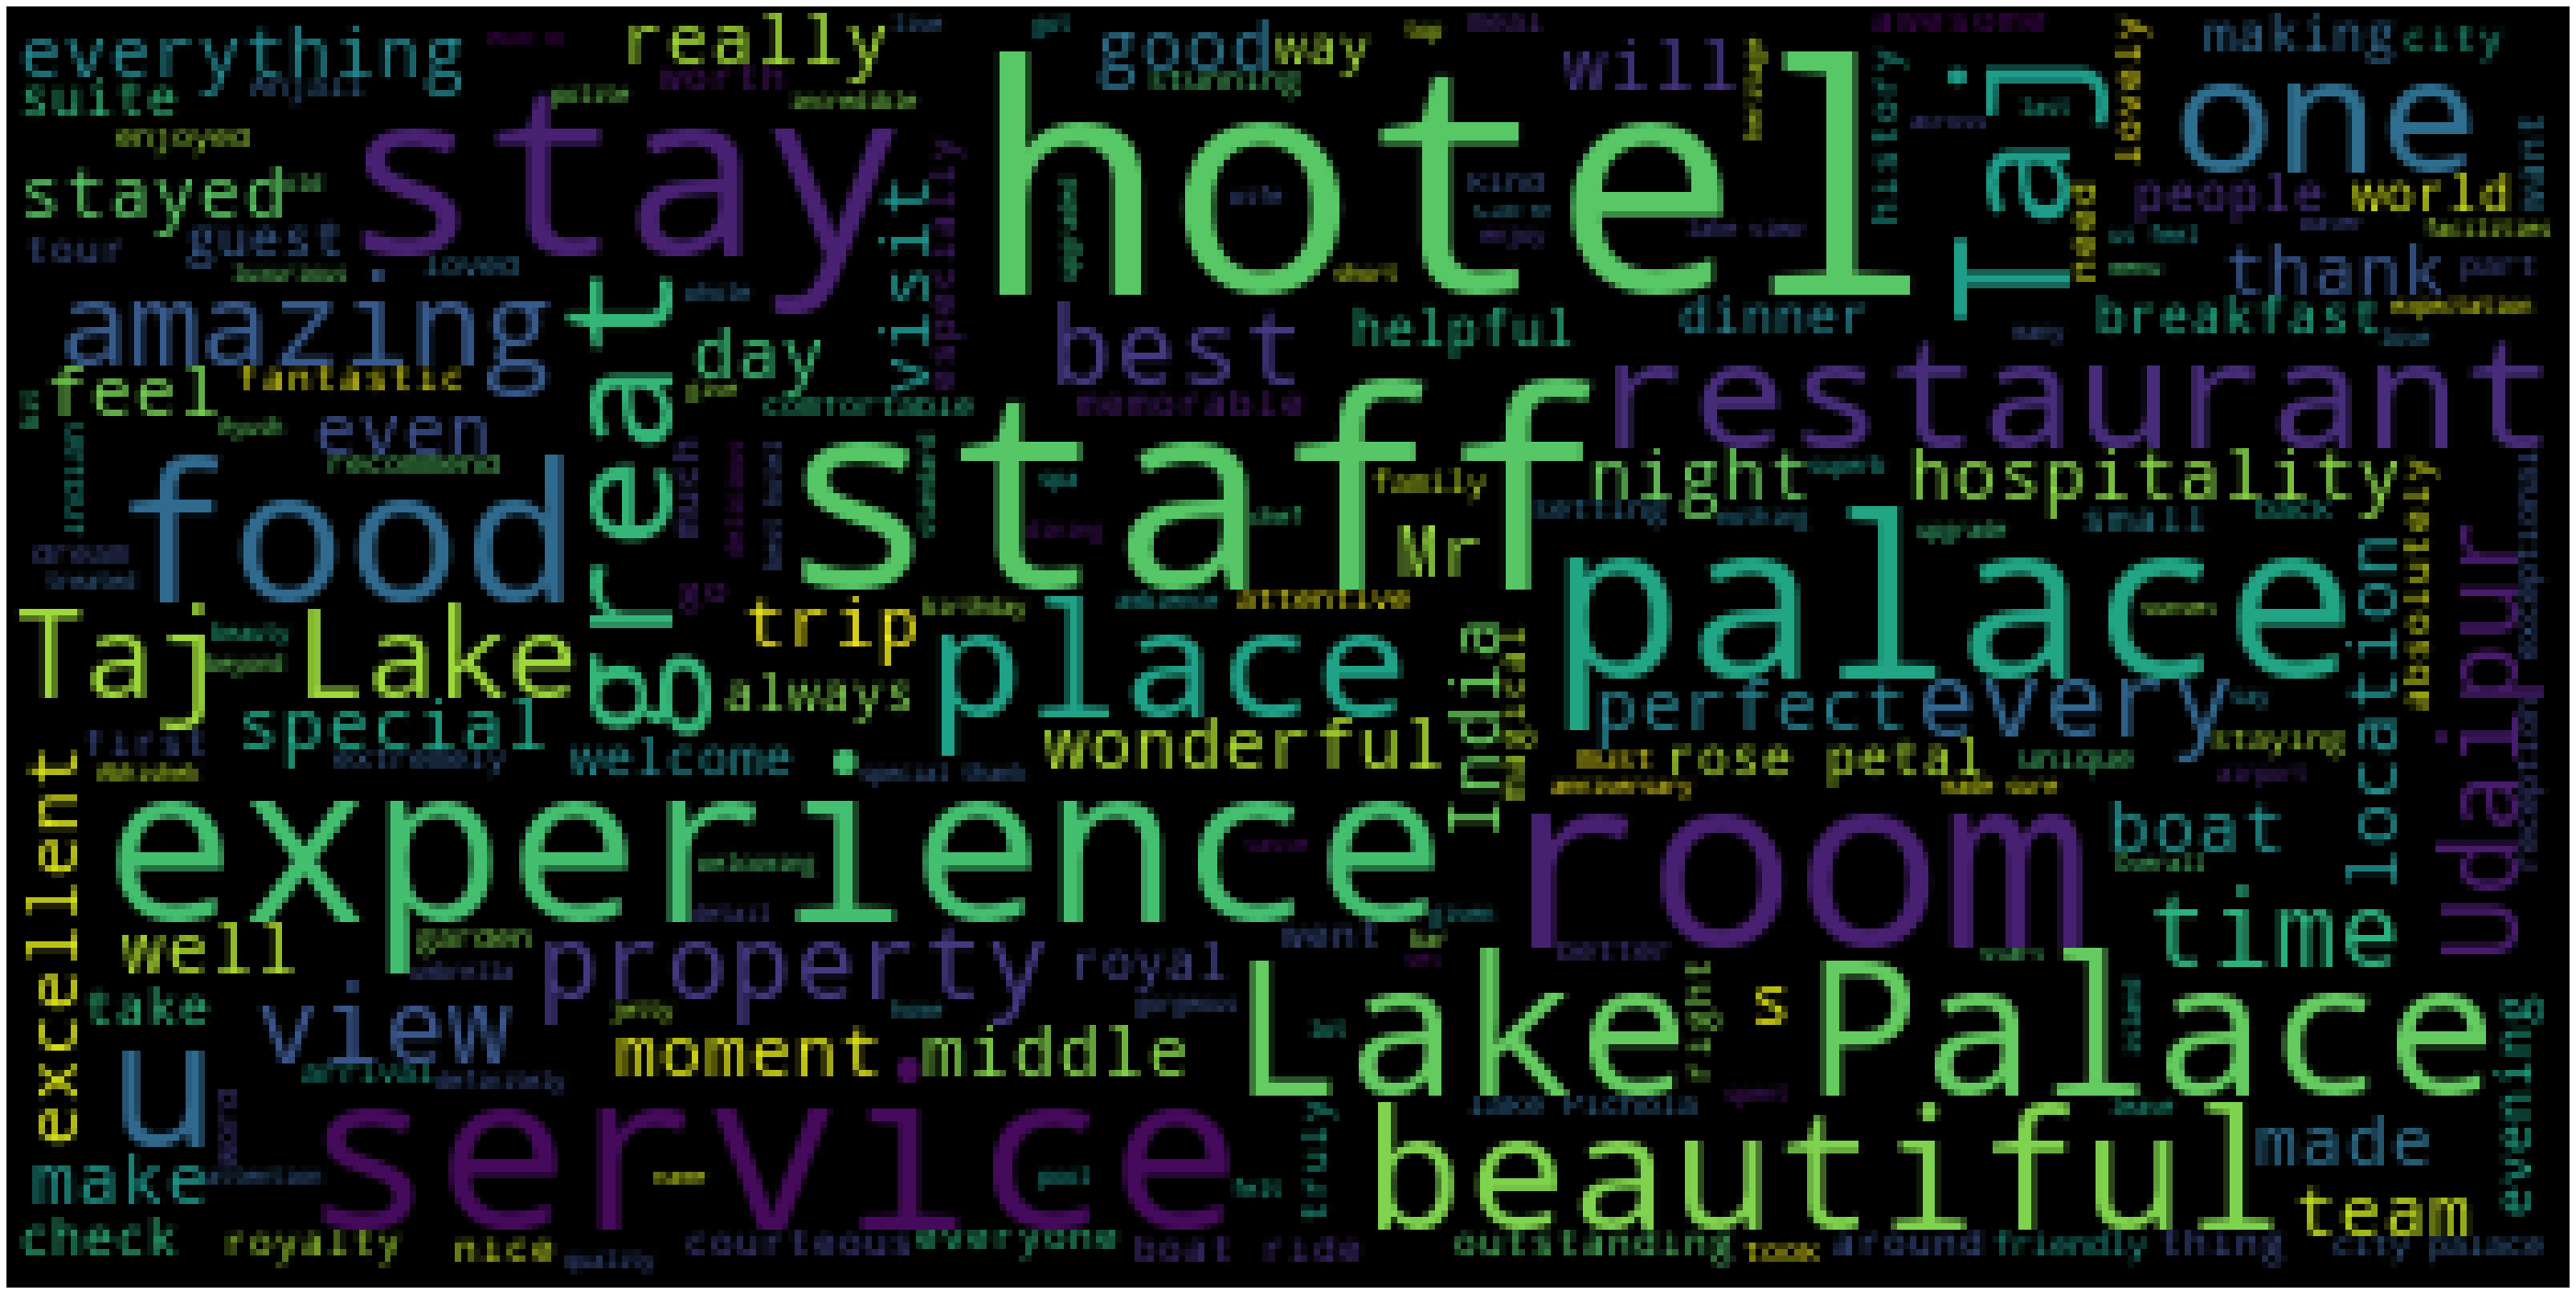

In [15]:
### Word Cloud for Negative Reviews
wc(Review_Taj_Udaipur['Review'],'black','Common Words' )

# Text Pre-processing: 
The text was converted from the human readable format to the computer readable format using the below steps.

### 1.Regex to remove numbers and special characters

In [16]:
### Cleaning our data..Removing punctuations, numbers and Special characters

def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df

Review_Taj_Agra = clean_text(Review_Taj_Agra, 'Review', 'Review_clean')
Review_Taj_Delhi = clean_text(Review_Taj_Delhi, 'Review', 'Review_clean')
Review_Taj_Udaipur = clean_text(Review_Taj_Udaipur, 'Review', 'Review_clean')

### 2. Stop words Removal

In [17]:
### Removing stop words
stop= set(stopwords.words('english'))
stop.update(['.',';',',','"',':','-','taj', 'hotel',"mahal"])


Review_Taj_Agra['Review_clean']= Review_Taj_Agra['Review_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Review_Taj_Delhi['Review_clean']= Review_Taj_Delhi['Review_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Review_Taj_Udaipur['Review_clean']= Review_Taj_Udaipur['Review_clean'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Review_Taj_Udaipur['Review_clean']

0      stayed lake palace two nights along family fri...
1      amazing mesmerizing experience staff welcoming...
2      last day trip udaipur decided stay lake palace...
3      visited property private dinner anniversary am...
4      starti mean totally different world ushering c...
                             ...                        
495    old run pigeons staff checkin arrogant sure pa...
496    location decore service attention detail simpl...
497    staff rude assumed didnt speak english would r...
498    wife recently went lake palace anniversary blo...
499    outstanding gourmet tour probably romantic wor...
Name: Review_clean, Length: 500, dtype: object

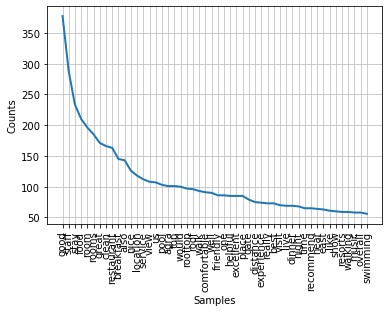

In [18]:
#### Getting the word frequency plot

string =[''.join(review) for review in Review_Taj_Agra['Review_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

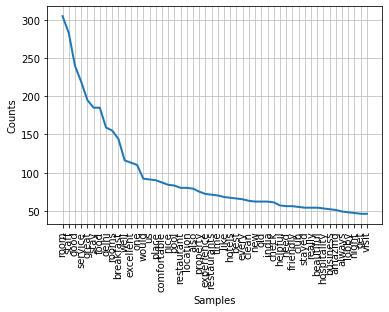

In [19]:
#### Getting the word frequency plot

string =[''.join(review) for review in Review_Taj_Delhi['Review_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

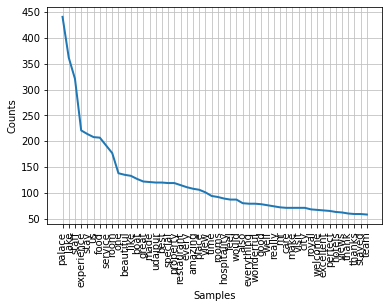

In [20]:
#### Getting the word frequency plot

string =[''.join(review) for review in Review_Taj_Udaipur['Review_clean'].values]
string1= str([''.join(string)])
words= nltk.word_tokenize(string1)
fdist = FreqDist(words)
fdist.plot(50)

### 3. Tokenisation

In [21]:
# Tokenizing the text

Review_Taj_Agra['Review_clean'] = Review_Taj_Agra['Review_clean'].apply(word_tokenize)
Review_Taj_Delhi['Review_clean'] = Review_Taj_Delhi['Review_clean'].apply(word_tokenize)
Review_Taj_Udaipur['Review_clean'] = Review_Taj_Udaipur['Review_clean'].apply(word_tokenize)
Review_Taj_Udaipur

,Review,Rating,Review_clean
0,We have stayed at taj lake palace for two nigh...,5.0,"[stayed, lake, palace, two, nights, along, fam..."
1,had an amazing and mesmerizing experience. The...,5.0,"[amazing, mesmerizing, experience, staff, welc..."
2,On the last day of our trip to Udaipur we deci...,5.0,"[last, day, trip, udaipur, decided, stay, lake..."
3,Visited the property for a private dinner for ...,5.0,"[visited, property, private, dinner, anniversa..."
4,Where should I start..........I mean we were i...,5.0,"[starti, mean, totally, different, world, ushe..."
...,...,...,...
495,"The hotel is very old, over run with pigeons a...",1.0,"[old, run, pigeons, staff, checkin, arrogant, ..."
496,"The location, decore, service and attention to...",5.0,"[location, decore, service, attention, detail,..."
497,The staff were very rude when they assumed tha...,1.0,"[staff, rude, assumed, didnt, speak, english, ..."
498,My wife and I recently went to Taj Lake Palace...,5.0,"[wife, recently, went, lake, palace, anniversa..."


### 4.Lemmatisation

In [22]:
## Applying lemmatization on our text
ls= WordNetLemmatizer()
Review_Taj_Agra['Review_clean'] = Review_Taj_Agra['Review_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

Review_Taj_Delhi['Review_clean'] = Review_Taj_Delhi['Review_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])

Review_Taj_Udaipur['Review_clean'] = Review_Taj_Udaipur['Review_clean'].apply(
        lambda lst: [ls.lemmatize(word, pos = 'v') for word in lst])


# LDA Modelling using Gensim Package

### Topic Modelling: 
Topic modelling is an unsupervised machine learning technique that can scan a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents. The DTM matrix having word frequency was the input for the LDA Topic modelling.
Basic assumption for carrying out topic modelling is that each document is a mixture of topics or theme and each topic or theme is a mixture of words. It a two-level hierarchical Bayesian model. Each document is not just a collection of words, but a collection of themes written as review.
Topics are extracted separately for the three Hotels.  
Topic Number selection: Number of topics were selected based on the Coherence vs number of topics plot. Highest coherence score was obtained for a very high number of topics. As it is not practically possible to select such a high value, a suitable number was selected for each model.
Also, the perplexity scores were between 6 and 8 for all the three models. Lower the perplexity score better is the model. Based on the top keywords in each topic, business context or meaningful topics were assigned for each of the model. Comparison is also done across the three hotels using top words from the visualisation tool. 


## TAJ MAHAL AGRA

In [23]:
text = [" ".join(review) for review in Review_Taj_Agra['Review_clean'].values]
# Create Dictionary
id2word = corpora.Dictionary(Review_Taj_Agra['Review_clean'])

# Create Corpus
texts = Review_Taj_Agra['Review_clean']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1)]]


In [24]:
#format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('agra', 1),
  ('definitely', 1),
  ('fantastic', 1),
  ('floor', 1),
  ('great', 1),
  ('helpful', 1),
  ('lovely', 1),
  ('lower', 1),
  ('pleasant', 1),
  ('position', 1),
  ('really', 1),
  ('shop', 1),
  ('staff', 1),
  ('stay', 3),
  ('thank', 1),
  ('well', 1),
  ('years', 1)]]

In [25]:
## Building a function to plot the coherence values for the Topics numbers
def compute_coherence_values(dictionary, corpus, texts, start,limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state = num_topics +100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

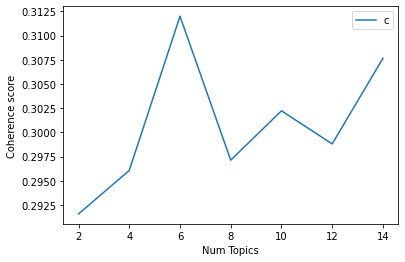

In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=15, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics(num_words=15))
doc_lda = lda_model[corpus]

[(0,
  '0.041*"stay" + 0.033*"good" + 0.030*"staff" + 0.023*"food" + 0.019*"resort" '
  '+ 0.018*"service" + 0.017*"top" + 0.015*"nice" + 0.015*"also" + '
  '0.014*"great" + 0.014*"restaurant" + 0.014*"roof" + 0.013*"clean" + '
  '0.013*"place" + 0.013*"excellent"'),
 (1,
  '0.015*"us" + 0.015*"go" + 0.014*"train" + 0.011*"india" + 0.010*"station" + '
  '0.008*"give" + 0.008*"happy" + 0.008*"main" + 0.008*"come" + 0.007*"star" + '
  '0.007*"mr" + 0.006*"check" + 0.006*"bite" + 0.006*"n" + 0.006*"ive"'),
 (2,
  '0.016*"marble" + 0.015*"shop" + 0.013*"road" + 0.013*"do" + '
  '0.011*"restaurants" + 0.010*"around" + 0.009*"customer" + 0.009*"nature" + '
  '0.009*"order" + 0.009*"outside" + 0.009*"team" + 0.008*"interest" + '
  '0.008*"unfortunately" + 0.007*"choose" + 0.007*"humble"'),
 (3,
  '0.035*"room" + 0.027*"good" + 0.019*"walk" + 0.018*"stay" + 0.018*"staff" + '
  '0.014*"great" + 0.013*"breakfast" + 0.013*"clean" + 0.011*"view" + '
  '0.010*"food" + 0.010*"location" + 0.010*"time

In [29]:
# Building a function to get the dominant topics for the documents.
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6145,"room, good, walk, stay, staff, great, breakfas...","[great, well, position, really, pleasant, help..."
1,1,3.0,0.5411,"room, good, walk, stay, staff, great, breakfas...","[staff, great, always, try, make, stay, comfor..."
2,2,3.0,0.9354,"room, good, walk, stay, staff, great, breakfas...","[agra, important, things, look, stay, closest,..."
3,3,3.0,0.4089,"room, good, walk, stay, staff, great, breakfas...","[excellent, staff, friendly, courteous, hr, ge..."
4,4,0.0,0.5396,"stay, good, staff, food, resort, service, top,...","[wife, stay, resort, nights, amaze, time, bran..."
5,5,2.0,0.4830,"marble, shop, road, do, restaurants, around, c...","[spend, days, agra, view, fort, main, sit, gui..."
6,6,0.0,0.5887,"stay, good, staff, food, resort, service, top,...","[gerat, stay, resort, excellent, location, exc..."
7,7,3.0,0.5805,"room, good, walk, stay, staff, great, breakfas...","[pleasant, stay, resort, delicious, breakfast,..."
8,8,3.0,0.7188,"room, good, walk, stay, staff, great, breakfas...","[great, within, walk, distance, east, gate, co..."
9,9,0.0,0.8486,"stay, good, staff, food, resort, service, top,...","[wonderful, time, excellent, stay, great, serv..."


In [30]:
# Perplexity, Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Coherence Score, hei
coherence_model_lda = CoherenceModel(model=lda_model, texts=Review_Taj_Agra['Review_clean'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.905203532794481

Coherence Score:  0.37377162002891523


In [31]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False,mds ='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1  30.154884
1      54.854797 -36.476795       2        1   6.553998
2      32.212929 -61.444572       3        1   3.887315
3       5.111096 -14.110332       4        1  48.950066
4      26.350170 -33.374702       5        1   5.622285
5      38.109818  -7.222781       6        1   4.831448, topic_info=      Term        Freq       Total Category  logprob  loglift
105   room  371.000000  371.000000  Default  30.0000  30.0000
13    stay  357.000000  357.000000  Default  29.0000  29.0000
261     us   85.000000   85.000000  Default  28.0000  28.0000
25    good  390.000000  390.000000  Default  27.0000  27.0000
252     go   70.000000   70.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
193  visit    8.831274  104.531265   Topic6  -4.5191   0.5588
515   bite    4.278726   16.331398   Topic6  -5.2438   1.6906
493   desk    3.871727   14.963117   Topic6  -5.3437   1.6781
211   wish    3.378774   11.375422   Topic6  -5.4799   1.8161
206   gate    4.165780   82.442215   Topic6  -5.2705   0.0448

[347 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
222       2  0.817225  access
222       3  0.163445  access
513       1  0.953800     add
0         1  0.229856    agra
0         4  0.737454    agra
...     ...       ...     ...
197       1  0.342281   would
197       4  0.635665   would
197       5  0.009779   would
88        4  0.978043   yadav
221       1  0.867941   yummy

[449 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

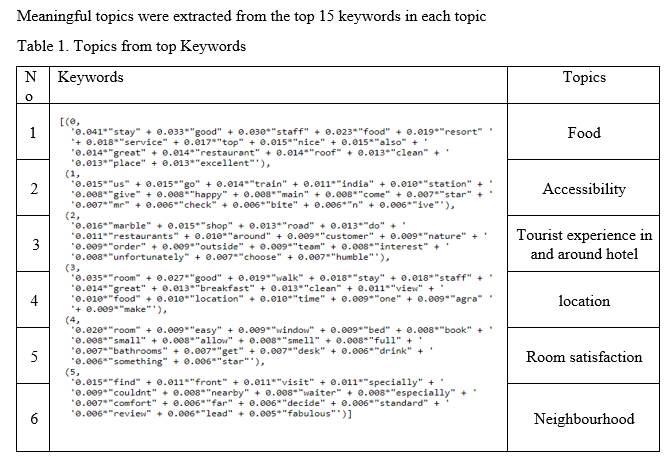

## TAJ MAHAL DELHI

In [32]:
text = [" ".join(review) for review in Review_Taj_Delhi['Review_clean'].values]
# Create Dictionary
id2word = corpora.Dictionary(Review_Taj_Delhi['Review_clean'])

# Create Corpus
texts = Review_Taj_Delhi['Review_clean']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 4), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1)]]


In [33]:
#format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('amit', 1),
  ('assure', 1),
  ('book', 1),
  ('close', 1),
  ('comfortable', 1),
  ('cosy', 1),
  ('desk', 1),
  ('din', 1),
  ('duty', 1),
  ('eve', 1),
  ('experience', 1),
  ('family', 2),
  ('feel', 1),
  ('front', 1),
  ('get', 1),
  ('gm', 1),
  ('go', 1),
  ('home', 1),
  ('involve', 1),
  ('knit', 1),
  ('krishnan', 1),
  ('like', 2),
  ('look', 1),
  ('make', 1),
  ('manager', 1),
  ('misunderstand', 1),
  ('mr', 4),
  ('new', 1),
  ('online', 1),
  ('rahul', 1),
  ('rishi', 1),
  ('room', 2),
  ('special', 1),
  ('spend', 1),
  ('stay', 1),
  ('tajness', 1),
  ('thank', 2),
  ('us', 1),
  ('years', 1)]]

In [34]:
## Building a function to plot the coherence values for the Topics numbers
def compute_coherence_values(dictionary, corpus, texts, start,limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,random_state = num_topics+100 )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

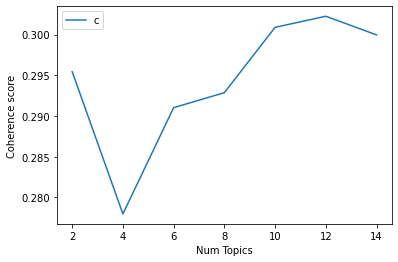

In [35]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=15, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [37]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.022*"food" + 0.015*"one" + 0.014*"restaurant" + 0.013*"machan" + '
  '0.012*"service" + 0.012*"star" + 0.011*"quality" + 0.011*"room" + '
  '0.011*"delhi" + 0.010*"pool"'),
 (1,
  '0.045*"without" + 0.040*"sit" + 0.018*"table" + 0.018*"international" + '
  '0.017*"year" + 0.015*"surround" + 0.009*"none" + 0.009*"ur" + 0.008*"couch" '
  '+ 0.008*"atmosphere"'),
 (2,
  '0.033*"room" + 0.017*"great" + 0.017*"come" + 0.015*"lobby" + '
  '0.014*"better" + 0.014*"club" + 0.013*"good" + 0.013*"nights" + '
  '0.011*"date" + 0.010*"lounge"'),
 (3,
  '0.025*"beautifully" + 0.018*"can" + 0.018*"not" + 0.018*"point" + '
  '0.018*"ground" + 0.017*"nicely" + 0.017*"light" + 0.017*"upon" + '
  '0.017*"certainly" + 0.012*"situate"'),
 (4,
  '0.053*"room" + 0.043*"stay" + 0.042*"good" + 0.029*"service" + '
  '0.027*"staff" + 0.025*"great" + 0.022*"excellent" + 0.019*"nice" + '
  '0.019*"food" + 0.016*"delhi"'),
 (5,
  '0.026*"staff" + 0.016*"make" + 0.016*"stay" + 0.014*"room" + 0.014*"us" + 

In [38]:
##get the dominant topics for the documents
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.4334,"mr, cuisine, family, thank, special, duty, hap...","[go, spend, cosy, close, knit, new, years, eve..."
1,1,9.0,0.6757,"detail, smile, name, impress, meet, fast, cent...","[stay, multiple, properties, obviously, best, ..."
2,2,1.0,0.4305,"without, sit, table, international, year, surr...","[check, palace, delhi, one, night, friends, ta..."
3,3,0.0,0.8573,"food, one, restaurant, machan, service, star, ...","[iconic, build, locate, heart, delhi, stone, a..."
4,4,4.0,0.4721,"room, stay, good, service, staff, great, excel...","[room, neat, clean, higenicbut, disappoint, qu..."
5,5,4.0,0.3665,"room, stay, good, service, staff, great, excel...","[stay, night, celebrate, husband, birthday, ma..."
6,6,5.0,0.7231,"staff, make, stay, room, us, delhi, india, bre...","[need, improve, cleaniness, give, heat, food, ..."
7,7,0.0,0.5107,"food, one, restaurant, machan, service, star, ...","[stay, birthday, wonderful, stay, mr, amarende..."
8,8,4.0,0.4265,"room, stay, good, service, staff, great, excel...","[locate, prime, location, great, place, stay, ..."
9,9,1.0,0.3435,"without, sit, table, international, year, surr...","[great, care, people, right, entry, exit, seam..."


In [39]:
# Perplexity, Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Coherence Score, hei
coherence_model_lda = CoherenceModel(model=lda_model, texts=Review_Taj_Delhi['Review_clean'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.13282848587038

Coherence Score:  0.41997051531355384


In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False,mds ='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0        5.310529  171.049652       1        1  14.717664
1      136.304657   23.800941       2        1   1.049135
2      101.190552  -84.985191       3        1  11.883671
3     -106.824867  148.841736       4        1   2.013066
4      -44.365761   78.632721       5        1  28.981134
5       43.884090   73.474022       6        1  29.101643
6      114.093971  135.933029       7        1   1.327697
7     -119.727142  -72.077179       8        1   1.678200
8      -49.518208   -9.617325       9        1   2.719225
9     -141.938736   40.055210      10        1   4.618738
10      38.731544  -14.776019      11        1   0.253639
11     -10.944340 -107.193344      12        1   1.656192, topic_info=           Term        Freq       Total Category  logprob  loglift
185        good  267.000000  267.000000  Default  30.0000  30.0000
31         room  480.000000  480.000000  Default  29.0000  29.0000
34         stay  345.000000  345.000000  Default  28.0000  28.0000
23         make   96.000000   96.000000  Default  27.0000  27.0000
334   excellent  141.000000  141.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
788  compliment    1.365322    2.022765  Topic12  -5.4534   3.7076
903       lodhi    1.314223    1.971648  Topic12  -5.4916   3.6950
187        less    3.096459    5.878559  Topic12  -4.6346   3.4596
189     quality    4.142299   37.255249  Topic12  -4.3436   1.9041
901      garden    2.288008   17.348810  Topic12  -4.9371   2.0748

[570 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1891      9  0.658280     absolute
1270      7  0.971291  accommodate
1700      9  0.905198          add
944       7  0.800618    afternoon
586       5  0.891805          age
...     ...       ...          ...
286       1  0.291613        would
286       3  0.100943        would
286       5  0.190670        would
286       6  0.414988        would
784       2  0.959494         year

[681 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

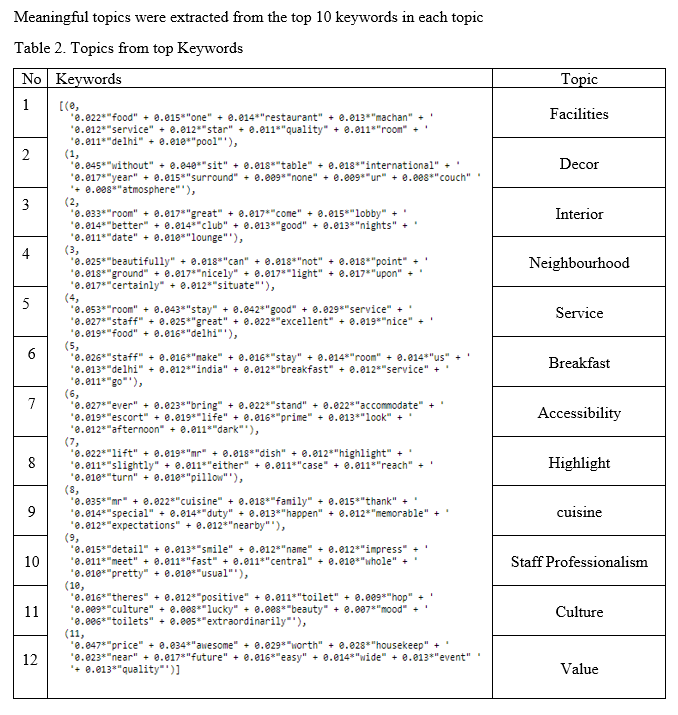

## TAJ MAHAL UDAIPUR

In [41]:
text = [" ".join(review) for review in Review_Taj_Udaipur['Review_clean'].values]
# Create Dictionary
id2word = corpora.Dictionary(Review_Taj_Udaipur['Review_clean'])

# Create Corpus
texts = Review_Taj_Udaipur['Review_clean']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2)]]


In [42]:
#format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('along', 1),
  ('attend', 1),
  ('ayush', 2),
  ('breakfast', 2),
  ('delicious', 1),
  ('dinner', 2),
  ('exceptional', 1),
  ('extraordinary', 1),
  ('family', 1),
  ('fantastic', 1),
  ('fast', 1),
  ('friends', 1),
  ('give', 1),
  ('jain', 1),
  ('lake', 1),
  ('memorable', 1),
  ('mr', 2),
  ('need', 1),
  ('nights', 1),
  ('palace', 1),
  ('personalise', 1),
  ('service', 3),
  ('stay', 1),
  ('taste', 1),
  ('thank', 1),
  ('two', 1),
  ('understand', 1),
  ('us', 2)]]

In [43]:
## Building a function to plot the coherence values for the Topics numbers
def compute_coherence_values(dictionary, corpus, texts, start,limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state = num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

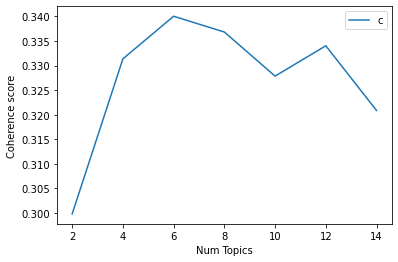

In [44]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=15, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics(num_words=15))
doc_lda = lda_model[corpus]

[(0,
  '0.016*"manager" + 0.012*"unforgettable" + 0.007*"minute" + 0.006*"jaipur" + '
  '0.006*"duty" + 0.005*"era" + 0.005*"process" + 0.005*"anyone" + '
  '0.005*"general" + 0.005*"memory" + 0.005*"dilip" + 0.005*"jharoka" + '
  '0.004*"direct" + 0.004*"distance" + 0.004*"handle"'),
 (1,
  '0.020*"good" + 0.009*"although" + 0.009*"palaces" + 0.008*"oberoi" + '
  '0.008*"term" + 0.007*"complete" + 0.006*"checkout" + 0.006*"interior" + '
  '0.006*"try" + 0.005*"udaivilas" + 0.005*"awsome" + 0.005*"ambiance" + '
  '0.004*"vacation" + 0.004*"bathrooms" + 0.004*"near"'),
 (2,
  '0.037*"staff" + 0.031*"stay" + 0.023*"experience" + 0.019*"service" + '
  '0.019*"food" + 0.015*"palace" + 0.013*"best" + 0.012*"lake" + 0.012*"great" '
  '+ 0.012*"amaze" + 0.010*"make" + 0.010*"would" + 0.010*"room" + '
  '0.010*"property" + 0.009*"like"'),
 (3,
  '0.031*"us" + 0.027*"make" + 0.022*"thank" + 0.019*"special" + '
  '0.019*"palace" + 0.016*"take" + 0.014*"team" + 0.013*"mr" + 0.012*"care" + '
  '0.

In [47]:
##get the dominant topics for the documents
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.8457,"staff, stay, experience, service, food, palace...","[stay, lake, palace, two, nights, along, famil..."
1,1,3.0,0.4409,"us, make, thank, special, palace, take, team, ...","[amaze, mesmerize, experience, staff, welcome,..."
2,2,4.0,0.3889,"palace, lake, room, view, boat, beautiful, pla...","[last, day, trip, udaipur, decide, stay, lake,..."
3,3,3.0,0.4375,"us, make, thank, special, palace, take, team, ...","[visit, property, private, dinner, anniversary..."
4,4,2.0,0.4439,"staff, stay, experience, service, food, palace...","[starti, mean, totally, different, world, ushe..."
5,5,0.0,0.5379,"manager, unforgettable, minute, jaipur, duty, ...","[wonderful, service, food, beverage, team, ayu..."
6,6,4.0,0.6631,"palace, lake, room, view, boat, beautiful, pla...","[get, back, lake, palace, place, beyond, compa..."
7,7,2.0,0.9280,"staff, stay, experience, service, food, palace...","[exceptional, hospitality, service, well, trai..."
8,8,2.0,0.9170,"staff, stay, experience, service, food, palace...","[stay, lake, palace, nights, th, anniversary, ..."
9,9,4.0,0.5275,"palace, lake, room, view, boat, beautiful, pla...","[lovely, time, tan, lake, palace, property, ac..."


In [48]:
# Perplexity, Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Coherence Score, hei
coherence_model_lda = CoherenceModel(model=lda_model, texts=Review_Taj_Udaipur['Review_clean'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.133842686482937

Coherence Score:  0.47021816133910477


In [49]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False,mds ='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1   2.827554
1      54.854797 -36.476795       2        1   2.647818
2      32.212929 -61.444572       3        1  35.298393
3       5.111096 -14.110332       4        1  17.322611
4      26.350170 -33.374702       5        1  38.624237
5      38.109818  -7.222781       6        1   3.279386, topic_info=        Term        Freq       Total Category  logprob  loglift
27        us  190.000000  190.000000  Default  30.0000  30.0000
45     staff  329.000000  329.000000  Default  29.0000  29.0000
206     good   68.000000   68.000000  Default  28.0000  28.0000
24     thank  104.000000  104.000000  Default  27.0000  27.0000
37      make  219.000000  219.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
292  airport    2.822098   20.647663   Topic6  -5.5343   1.4274
336    never    2.755303   19.034491   Topic6  -5.5582   1.4848
34      feel    3.450609   93.111870   Topic6  -5.3332   0.1223
25       two    2.735982   29.524864   Topic6  -5.5652   1.0388
504  receive    2.218392   13.607872   Topic6  -5.7750   1.6036

[344 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
291       5  0.983400     across
734       6  0.924329  afternoon
735       6  0.933844        air
292       4  0.823338    airport
292       6  0.145295    airport
...     ...       ...        ...
264       4  0.035433      would
264       5  0.035433      would
733       6  0.773499    wouldnt
1084      1  0.786243      wrong
2314      6  0.672443      youll

[466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

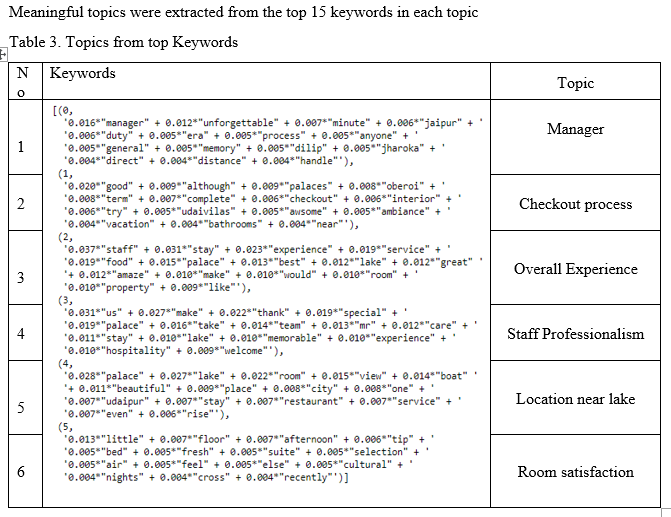

# Recommendations:
From the Topic modelling process recommendations can be made to the Taj, Agra management on the following business aspects or metrics.
1 Room Satisfaction: Hotel Taj, Agra had some words like smell, something, allow usually associated with negative feeling as some top words which indicates some issues with the rooms and hence an area for improvement. Hotel Taj at Udaipur had some positive words like fresh, suite, cultural which shows that customers like their rooms.
2. Interiors and Décor: Some words like small, bathrooms, window indicate negative reviews about the Hotel Taj, Agra. Rooms having these should renovated.
3. Staff professionalism.: Reviews for Hotel Taj at Udaipur and Delhi, had top keywords like thank, special, smile, care, impress, detail which indicates trained and professional staff.  The Management of Hotel Taj Agra can arrange some training program for the existing staff on behavioural aspects and customer satisfaction.
4. Checkout process: Improving the checkout/check-in process can also be done to make the better customer experience better as done at the Taj, Udaipur.
Improving on the above metrics, higher customer satisfaction can be achieved which will eventually lead to higher revenue. 
